In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('csv/data/Advertising.csv')
data = data[['TV','Sales']]
data.head(10)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
5,8.7,7.2
6,57.5,11.8
7,120.2,13.2
8,8.6,4.8
9,199.8,10.6


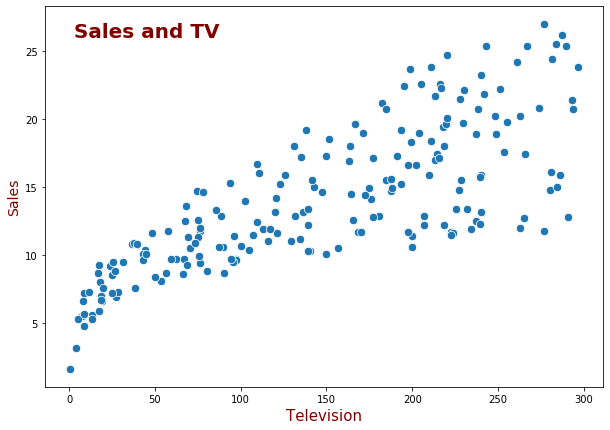

In [3]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(x='TV', y='Sales', data=data, s=70)

title = 'Sales and TV'
ax.text(45,26,title,horizontalalignment='center',color='#800000',fontsize=20,fontweight='bold')

ax.set_xlabel('Television', fontsize=15, color='#800000')
ax.set_ylabel('Sales', fontsize=14, color='#800000')

plt.savefig('fig/sales_vs_tv.png',bbox_inches='tight')

In [4]:
data.columns = ['x','y']
data.head(2)

,x,y
0,230.1,22.1
1,44.5,10.4


### Simple Linear Regression From Scratch

In [5]:
data['(x-x_mean)'] = round(data['x'] - data['x'].mean(),2)
data['(y-y_mean)'] = round(data['y'] - data['y'].mean(),2)
data['(x-x_mean)(y-y_mean)'] = data['(x-x_mean)'] *data['(y-y_mean)']
data['pow((x-x_mean),2)'] = round(pow(data['x'] - data['x'].mean(),2),2)

In [6]:
data.head(10)

,x,y,(x-x_mean),(y-y_mean),(x-x_mean)(y-y_mean),"pow((x-x_mean),2)"
0,230.1,22.1,83.06,8.08,671.1248,6898.55
1,44.5,10.4,-102.54,-3.62,371.1948,10514.96
2,17.2,9.3,-129.84,-4.72,612.8448,16859.07
3,151.5,18.5,4.46,4.48,19.9808,19.87
4,180.8,12.9,33.76,-1.12,-37.8112,1139.57
5,8.7,7.2,-138.34,-6.82,943.4788,19138.65
6,57.5,11.8,-89.54,-2.22,198.7788,8017.86
7,120.2,13.2,-26.84,-0.82,22.0088,720.52
8,8.6,4.8,-138.44,-9.22,1276.4168,19166.33
9,199.8,10.6,52.76,-3.42,-180.4392,2783.35


In [7]:
b1 = data['(x-x_mean)(y-y_mean)'].sum() / data['pow((x-x_mean),2)'].sum()
b1

0.047536644161412324

In [8]:
data['y'].mean(), data['x'].mean()

(14.022500000000003, 147.0425)

In [9]:
b0 = data['y'].mean() - b1 * data['x'].mean()
b0

7.032593000895531

In [10]:
14.022500000000003 - (0.047536644161412324 * 147.0425)

7.032593000895531

In [11]:
data['y_pred'] = b0 + b1*data['x']
data.to_csv('csv/result/simple_linear_regression.csv',index=False)

### Simple Linear Regression with sklearn

In [12]:
x = data.x.values.reshape(-1,1)
y = data.y.values.reshape(-1,1)

model = LinearRegression().fit(x, y)

b0 = float(model.intercept_[0])
b0 = round(b0,3)
b1 = float(model.coef_[0][0])
b1 = round(b1,3)
print('intercept (b0 ): ', b0)
print('slope (b1) : ', b1)
print(' ')
textstr = 'y = '+str(b0)+' + '+str(b1)+' * x'
print(textstr)

intercept (b0 ):  7.033
slope (b1) :  0.048
 
y = 7.033 + 0.048 * x


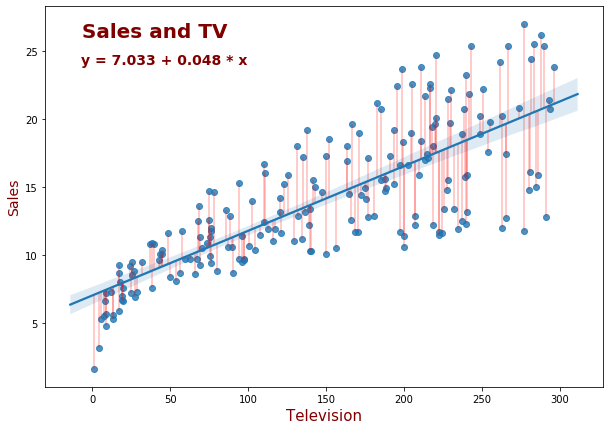

In [13]:
fit = np.polyfit(data['x'], data['y'], deg=1)
y_hat = fit[1] + data['x'] * fit[0]

fig, ax = plt.subplots(figsize=(10,7))
sns.regplot('x', 'y', data=data)
plt.vlines(data['x'], y_hat, data['y'], lw = .4, colors='r');

title = 'Sales and TV'
ax.text(40,26,title,horizontalalignment='center',color='#800000',fontsize=20,fontweight='bold')
ax.text(46,24,textstr,horizontalalignment='center',color='#800000',fontsize=14,fontweight='bold')
ax.set_xlabel('Television', fontsize=15, color='#800000')
ax.set_ylabel('Sales', fontsize=14, color='#800000')

plt.savefig('fig/sales_vs_tv_slm.png',bbox_inches='tight')

In [14]:
7.033 + (0.048 * 100)

11.833